In [1]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np

from microhhpy.spatial import Domain, plot_domains
from microhhpy.land import create_land_surface_input, Land_surface_input

## Idealised heterogeneous land-use
If you manually want to create spatially varying land-surface input, for example for idealised cases, the `Land_surface_input()` is a help class for creating/saving all required MicroHH input fields.

In [2]:
lsm_input = Land_surface_input(
    itot = 32,
    jtot = 32,
    ktot = 4,
    TF = np.float32,
    debug = True
)

# List all 2D and 3D input fields:
print('2D:', lsm_input.fields_2d)
print('3D:', lsm_input.fields_3d)

2D: ['c_veg', 'z0m', 'z0h', 'gD', 'lai', 'alb_dir', 'alb_dif', 'rs_veg_min', 'rs_soil_min', 'lambda_stable', 'lambda_unstable', 'cs_veg', 'water_mask', 't_bot_water', 'index_veg']
3D: ['t_soil', 'theta_soil', 'index_soil', 'root_frac']


All properties are 2D or 3D Numpy arrays:

In [3]:
lsm_input.c_veg[:,:] = 0.5
lsm_input.z0m[:,:] = 0.01

Save to binary (input model) and/or NetCDF (visualisation). With `debug=True`, the code checks if all 2D and 3D fields are initialised.

In [4]:
lsm_input.save_binaries('.', allow_overwrite=True)
lsm_input.save_netcdf('lsm_input.nc', allow_overwrite=True)

[2025/08/11 11:38:02] [microhhpy] [WARNING] Uninitialised land-surface fields: z0h, gD, lai, alb_dir, alb_dif, rs_veg_min, rs_soil_min, lambda_stable, lambda_unstable, cs_veg, water_mask, t_bot_water, index_veg, t_soil, theta_soil, index_soil, root_frac'


## Realistic heterogeneous land-use
For realistic cases, we provide methods to create land-surface input from:
- [Corine, Europe, 100m resolution](https://land.copernicus.eu/en/products/corine-land-cover)
- [LCC, Global, 100 m resolution](https://land.copernicus.eu/en/products/global-dynamic-land-cover/copernicus-global-land-service-land-cover-100m-collection-3-epoch-2019-globe)
- [LCC, Global 10 m resolution](https://land.copernicus.eu/en/products/global-dynamic-land-cover/land-cover-2020-raster-10-m-global-annual) : TODO!

In [5]:
corine_tiff = '/home/scratch1/meteo_data/Corine/u2018_clc2018_v2020_20u1_raster100m/DATA/U2018_CLC2018_V2020_20u1.tif'
lcc_tiff = '/home/scratch1/meteo_data/LCC/PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326.tif'

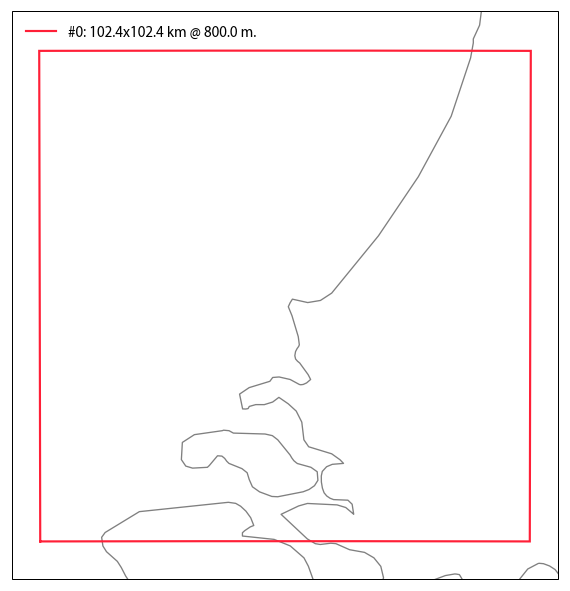

In [6]:
"""
Setup domain / projection.
"""
lon = 4
lat = 52
proj_str = f'+proj=lcc +lat_1={lat-1} +lat_2={lat+1} +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'

dom = Domain(
    xsize = 102400,
    ysize = 102400,
    itot = 128,
    jtot = 128,
    lon = lon,
    lat = lat,
    anchor = 'center',
    proj_str = proj_str)

plot_domains([dom], use_projection=True)

In [7]:
#create_land_surface_input(
#    land_use_source='corine',
#    land_use_tiff=corine_tiff,
#)

In [8]:
# Cleanup!
files = glob.glob('*00*') + glob.glob('*.nc')
for f in files:
    os.remove(f)